|| JAI BABA KI || || RADHEYKRISHNA ||

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [2]:
df = pd.read_csv("hf://datasets/jhan21/amazon-food-reviews-dataset/Reviews.csv")

In [3]:
print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [4]:
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


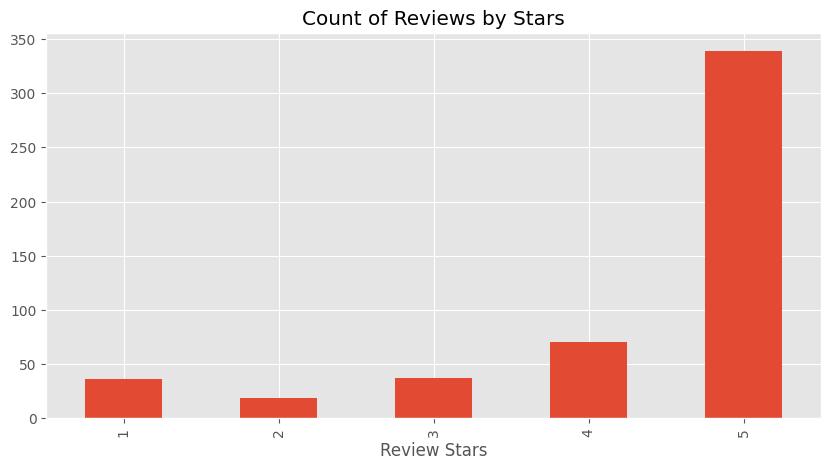

In [5]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',
                                             title='Count of Reviews by Stars',
                                             figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

# I'm visualizing the ratings of reviews.

basic nltk

In [6]:
ex = df['Text'][50]
print(ex)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [7]:
# i just imported nltk to tokenize ex but punkt_tab isnt working... so, colab AI auto-corrected it.
import nltk
nltk.download('punkt_tab')
ex = df['Text'][50]
print(ex)
tokens = nltk.word_tokenize(ex)
# iss step par jo string hai mtlb jo sentence hai, usko words mein tod deta hai... usse easy ho jaata hai model ko samjhne mein
print(tokens)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.
['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


In [8]:
tokens[:10]
# jo example ke liye sentence choose kiya tha.. uske 10 word print kare hai, to check it.

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [9]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('tagsets')
tagged = nltk.pos_tag(tokens)
# yaha hum har ek word ko tag de rahe hain... Like word pronoun hai, noun hai, verb hai, adjective hai etc.
# aur tags bhi short-forms m aate hai... Like pronoun(PRP), noun(NN) etc.
#print(tagged)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [10]:
import nltk

# Download the required resource
nltk.download('maxent_ne_chunker')
nltk.download('maxent_ne_chunker_tab') # Download the missing data
nltk.download('words') # Download the 'words' data package


entitles = nltk.chunk.ne_chunk(tagged)
# chunk.ne_chunk(tagged) ke through AI samjh raha hai ki jo tagged mein words hai vo person hai, place hai, organisation hai etc.
# ye TREE structure bana deta hai... (ye toh pre-trained model hi kar raha hai... so..,) # o/p work

entitles.pprint()
# it'll print that o/p tree structure in readable format.

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


VADER sentiment scoring

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that assigns scores between -1 (most negative) and +1 (most positive) to text, indicating the intensity and polarity of sentiment.

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer # it'll calculate sentimemt scores to classify it further.
from tqdm.notebook import tqdm
# tqdm ka simple sa kaam hota hai progress bar show karna... iss block ke baad, 4th block mein output mein ek progress bar show ho raha hai... vo issi library se aata hai...
# jab hamare paas bada dataset hota hai toh progress bar ke through pata chlta rehta hai ki kitna progress hua hai.. bs yahi hai

import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
# humne sentiment calculator ko ek variable se define kar diya hai... toh ab sentiment analyze karne ke liye baar-baar itna bada likhne ki zarurat nahi hai...
# sia use karke kar sakte hain.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
sia.polarity_scores("I am so happy")
# polarity_scores se sentence ke 4 scores aate hain... negative(neg) , neutral(neu), positive(pos) and compound(net).

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [12]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [13]:
sia.polarity_scores(ex)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

running polarity score on whole dataset

In [14]:
from tqdm import tqdm  # instead of tqdm.notebook

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

# finding polarity scores of all sentences and storing it in 'res' dictionary.

100%|██████████| 500/500 [00:00<00:00, 1128.85it/s]


In [15]:
res
# vahi dictionary hai, jis mein scores store kiye...

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [16]:
vaders = pd.DataFrame(res).T
# res ek dictionary thi, aur usko padhna is quite uneasy... toh usko dataframe(tabular format) m convert kar diya... and uska transpose kar diya.

vaders= vaders.reset_index().rename(columns={'index': 'Id'})
# index ko ek normal column bana deta hai.
# also 'index' ko 'id' se replace kar diya.

vaders = vaders.merge(df, left_on='Id', right_on='Id')


In [17]:
vaders.head()
# vaders consist of vader score of all reviews

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


VADER results plot

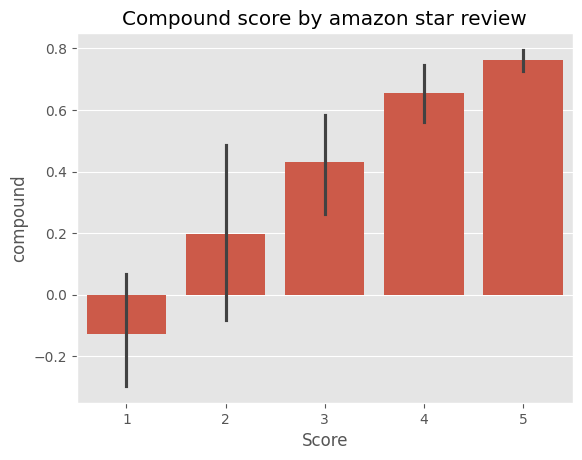

In [18]:
#vader results graph
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound score by amazon star review')
plt.show()

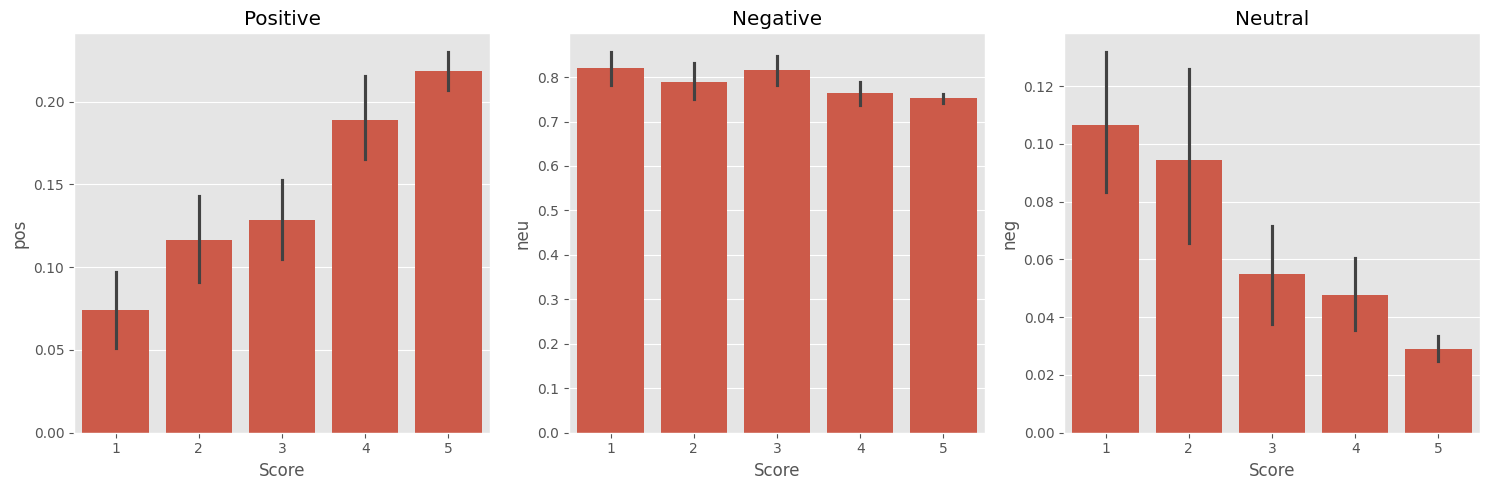

In [19]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders, x='Score', y='pos', ax =axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax =axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax =axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
plt.tight_layout()
plt.show()

# pos, neu and neg ka rating-vise visualization.

ROBERTa pre-trained model


In [21]:
!pip install transformers


In [20]:
#!pip install --upgrade transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# autoTokenizer : words ko tokens m todta hai. eg. "I am happy" → [101, 146, 1821, 999, 102].

# automodel... : ye ek model load  krta hai jo sequence classify krt hai like pos, neu and neg in sentiment classifications.

In [21]:
from scipy.special import softmax

# while predicting the o/p, model gives us raw o/p which we can't understand directly. So, softmax uss data ko probabilities m convert kar deta (o-1 range)

i've used "twitter roberta model".
It'll be doing tranfer learning from a bunch of twitter comments, and we don't have to train it... As its already trained.

In [22]:
# ye model maine hugging face se liya hai
from transformers import AutoTokenizer, AutoModelForSequenceClassification

MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

#tokenizer = AutoTokenizer.from_pretrained(MODEL)  # load a matching tokenizer to above model
#model = AutoModelForSequenceClassification.from_pretrained(MODEL) # load ROBERTa based classification model

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hp\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment-latest. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\h

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [23]:
print(ex)
sia.polarity_scores(ex)

#VADER result on ex

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [24]:
en_text = tokenizer(ex, return_tensors='pt')  #encode text
op = model(**en_text)
scores = op[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)
#running ROBERTa model

{'roberta_neg': 0.9535124, 'roberta_neu': 0.040926386, 'roberta_pos': 0.005561252}


By above results, we can clealy see that how effective ROBERTa model is.

In [26]:
def polarity_scores_roberta(ex):
  en_text = tokenizer(ex, return_tensors='pt')  #encode text
  op = model(**en_text)
  scores = op[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]
  }
  return scores_dict

In [27]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value


    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result_rename, **roberta_result}
    res[myid] = both
  except RuntimeError:
    print(f'Broke for id {myid}')

  # taking ROBERTa scores and storing it in a dictionary and combined vader-roberta scores

 17%|█▋        | 83/500 [00:27<02:40,  2.59it/s]

Broke for id 83


 38%|███▊      | 188/500 [00:55<00:54,  5.75it/s]

Broke for id 187


100%|██████████| 500/500 [02:34<00:00,  3.24it/s]


In [28]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [29]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.010578,0.038816,0.950607,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.716768,0.271225,0.012007,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.005176,0.077858,0.916966,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002919,0.047125,0.949957,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.004527,0.009283,0.986190,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Compare scores of both the models

In [30]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

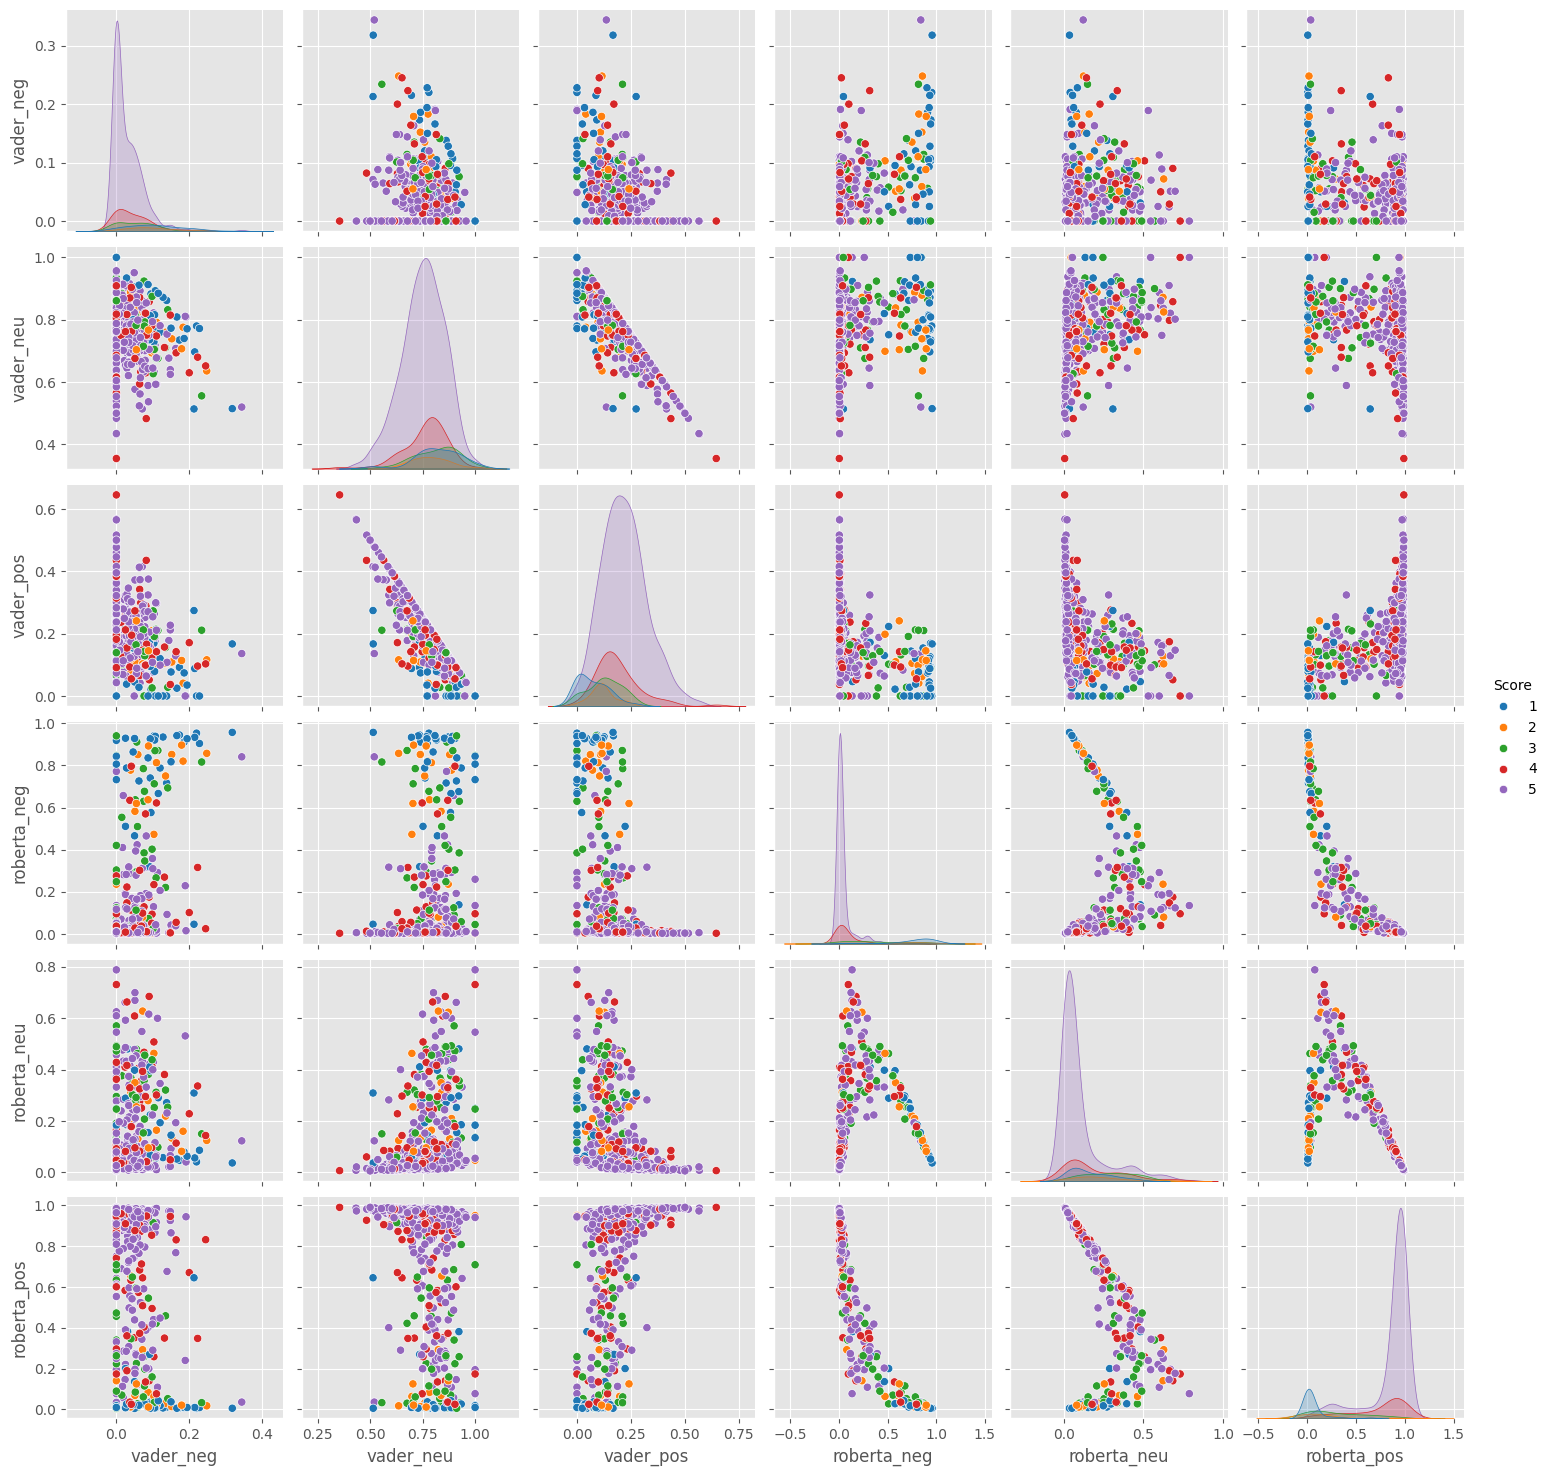

In [31]:
sns.pairplot(data = results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu','roberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()

# hue : ye batata hai ki plotting time par colors kis basis par change honge.

# positive sentiment

In [ ]:
# positive sentiment

In [32]:
results_df.query('Score==1').sort_values('roberta_pos',ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [33]:
results_df.query('Score==1').sort_values('vader_pos',ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [34]:
# negative sentiment 5-star review

# negative sentiment 5-star review

In [35]:
results_df.query('Score==5').sort_values('roberta_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [36]:
results_df.query('Score==5').sort_values('vader_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

Extra: Transformer pipline
(quick and easy way to run sentiment predictions)

In [37]:
from transformers import pipeline

In [38]:
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hp\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not ins

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


write any statement and it'll tell you that whether its positive or negative

In [39]:
sent_pipeline('I am so happy')

[{'label': 'POSITIVE', 'score': 0.9998812675476074}]

In [40]:
sent_pipeline('if you have done this work, i would have been happy.')

[{'label': 'POSITIVE', 'score': 0.9952647686004639}]

In [41]:
sent_pipeline('Life is soo fucked up but still there is a hope.')

[{'label': 'POSITIVE', 'score': 0.9975495934486389}]

In [42]:
sent_pipeline('Life is soo fucked up but still there is a hope of being neutral')

[{'label': 'NEGATIVE', 'score': 0.9864087104797363}]

In [44]:
# Define a directory to save the model
save_directory = "roberta_sentiment_model"

# Save the model and tokenizer
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

# You can load it back later using:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# loaded_model = AutoModelForSequenceClassification.from_pretrained(save_directory)
# loaded_tokenizer = AutoTokenizer.from_pretrained(save_directory)

('roberta_sentiment_model\\tokenizer_config.json',
 'roberta_sentiment_model\\special_tokens_map.json',
 'roberta_sentiment_model\\vocab.json',
 'roberta_sentiment_model\\merges.txt',
 'roberta_sentiment_model\\added_tokens.json',
 'roberta_sentiment_model\\tokenizer.json')